## Практическое занятие 5
## Математический анализ
## Численное решение нелинейных уравнений: nsolve
https://docs.sympy.org/latest/modules/solvers/solvers.html?highlight=nsolve#sympy.solvers.solvers.nsolve

#### Уравнение в форме $f(x)=0$

In [2]:
import numpy as np
import sympy
from sympy import nsolve
import matplotlib.pyplot as plt
%matplotlib inline

### Задача 1
Решить уравнение $𝑥^4−e^x=0$ при $-2 \le x \le 2$, построить график левой части, отметить точки пересечения с осью ОХ.

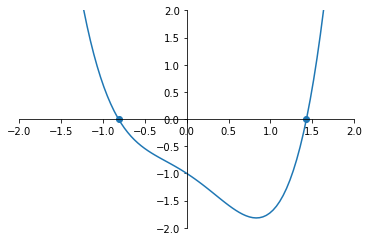

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from sympy.abc import x

# Построение графика
X = np.linspace(-2, 2, 100)  # 100 - гладкость графика
plt.plot(X, X ** 4 - np.e ** X)

# Визуальные настройки
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# Точки пересечения с осью OX
root1 = sympy.nsolve(x ** 4 - np.e ** x, x, -0.8)
root2 = sympy.nsolve(x ** 4 - np.e ** x, x, 1.4)
plt.scatter([root1, root2], [0, 0])

### Задача 2.
Решить уравнение $\sin^2(2x)=\ln x$ при $0< x \le 3$. Построить графики левой и правой части, отметить точку пересечения графиков.

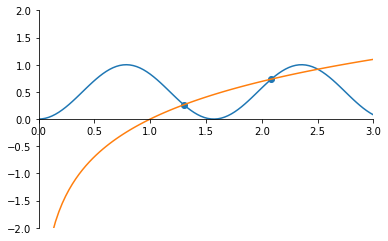

In [87]:
import matplotlib.pyplot as plt
import numpy as np
from sympy.abc import x

# Построение графика
X = np.linspace(0.0000001, 3, 100)  # 100 - гладкость графика
plt.plot(X, np.sin(2 * X) ** 2)
plt.plot(X, np.log(X))

# Визуальные настройки
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
plt.xlim(0, 3)
plt.ylim(-2, 2)

# Точки пересечения графиков
point1_x = sympy.nsolve(sympy.sin(2 * x) ** 2 - sympy.log(x), x, 1)
point2_x = sympy.nsolve(sympy.sin(2 * x) ** 2 - sympy.log(x), x, 2)
point1_y = sympy.sin(2 * point1_x) ** 2
point2_y = sympy.sin(2 * point2_x) ** 2
plt.scatter([point1_x, point2_x], [point1_y, point2_y])

### Задача 3.
Решить уравнение $\sin^2(2x^2-7x+6)=3/4$ на $[3, 4]$. Построить графики левой и правой части, отметить точки пересечения графиков.

[3.38722138942523, 3.21863715818210, 3.68072303274915, 3.81186570968780]


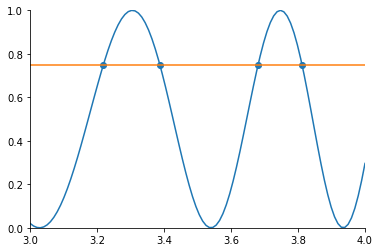

In [124]:
import matplotlib.pyplot as plt
import numpy as np
from sympy.abc import x

# Построение графика
X = np.linspace(3, 4, 100)  # 100 - гладкость графика
plt.plot(X, np.sin(2 * X * X - 7 * X + 6) ** 2)
plt.plot(X, 0.75 + X * 0)

# Визуальные настройки
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
plt.xlim(3, 4)
plt.ylim(0, 1)

# Точки пересечения графиков
points_x, points_y = [], []
for precise_root in [2, 3, 3.5, 3.7]:
    point_x = sympy.nsolve(sympy.sin(2 * x * x - 7 * x + 6) ** 2 - 0.75, x, precise_root)
    point_y = 0.75
    points_x.append(point_x)
    points_y.append(point_y)
print(points_x)
plt.scatter(points_x, points_y)

### Задача 4.
Решить уравнение ${\rm tg}^4(2x^2+1)-10=0$ на интервале $[0, 0.2]$ методом дихотомии. График строить не нужно.

In [133]:
# Вычисление корня
equation = sympy.Eq(sympy.tan(2 * x * x + 1) ** 4 - 10, 0)
root = sympy.nsolve(equation, x, [0, 0.2], solver='bisect', verify=False)
print(root)

0.171066377483446


[-2, -1, 0, 1, 2, -pi/2, -pi/4, pi/4, pi/2]

### Задача 5.
Решить систему уравнений 
$$
\left\{\begin{matrix}
(x - 1)^2 + (y - 2)^2 + (z + 3)^2 = 25\\
x + y + z = 0\\
-2x + 3y - z = 7
\end{matrix}\right.
$$
начальное приближение (0, 0, 0).
Проверить подстановкой.

In [135]:
from sympy.abc import x, y, z

# Подсчёт корня
eq1 = sympy.Eq((x - 1)**2 + (y - 2)**2 + (z + 3) ** 2, 25)
eq2 = sympy.Eq(x + y + z, 0)
eq3 = sympy.Eq(-2*x+3*y-z, 7)
root = sympy.nsolve((eq1, eq2, eq3), (x, y, z), (0, 0, 0))
print(root)

# Подстановка корня в систему уравнений
x0, y0, z0 = root
print((x0 - 1)**2 + (y0 - 2)**2 + (z0 + 3) ** 2 == 25)
print(x0 + y0 + z0 == 0)  # wolfram -> -0.0000000000000002
print(-2*x0+3*y0-z0 == 7)

Matrix([[-2.08606699924184], [1.22848325018954], [0.857583749052298]])
True
False
True


### Индивидуальное задание
Построить графики функций $f(x)$ и $g(x)$, уточнить координаты точек пересечения, решая численно соответствующее уравнение. На  графике отметить и подписать буквами $А_1$, $A_2$, ... точки пересечения графиков.  

N36
\begin{align*}
 f(x) = \frac{x^{2}}{9} + \frac{11 x}{9} + \frac{73}{9}\\
 g(x) = \frac{5 x^{2}}{9} + \frac{19 x}{9} + \frac{41}{9}
\end{align*}

Text(1.60000000000000, 11.4000000000000, 'A2')

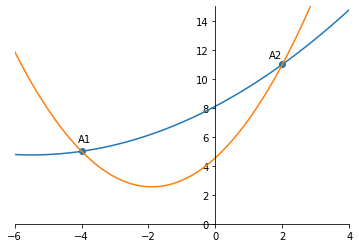

In [172]:
import matplotlib.pyplot as plt
import numpy as np
from sympy.abc import x

# Построение графика
X = np.linspace(-10, 10, 1000)  # 100 - гладкость графика
plt.plot(X, X**2/9 + 11*X/9 + 73/9)
plt.plot(X, 5*X**2/9 + 19*X/9 + 41/9)

# Визуальные настройки
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
plt.xlim(-6, 4)
plt.ylim(0, 15)

# Точки пересечения графиков
points_x, points_y = [], []
for precise_root in [-4, 2]:
    point_x = sympy.nsolve(x**2/9 + 11*x/9 + 73/9 - 5*x**2/9 - 19*x/9 - 41/9 , x, precise_root)
    point_y = point_x**2/9 + 11*point_x/9 + 73/9
    points_x.append(point_x)
    points_y.append(point_y)
plt.scatter(points_x, points_y)

ax.annotate('A1', xy=(points_x[0], points_y[0]), xycoords='data', xytext=(points_x[0] - 0.1, points_y[0] + 0.6), textcoords='data')
ax.annotate('A2', xy=(points_x[1], points_y[1]), xycoords='data', xytext=(points_x[1] - 0.4, points_y[1] + 0.4), textcoords='data')